#  Runge Kutta Method for solving differential equations

Assume that we have a heat transfer problem
![Image](https://github.com/kpmooney/numerical_methods_youtube/raw/fe88a1f4a0c2d4cbab6353c06e68a4f3de22b2f8/runge_kutta/circuit.png)
The ODE that gives temperature as a function of time is:

$$\frac{dT}{dt} = -\frac{k}{c}(T - T_w)$$

with $T(0) = T_0$.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp #solve initial value problem for a system of ODEs

%matplotlib inline

In [11]:
def heat_equations(t, T):
    k = 0.075
    C = 10
    T_w = 20

    return -k * (T - T_w) / C

### Euler Method
Suppose we want to solve the problem:

$$\frac{dy}{dt} = f(t, y)$$

Note that $$y(t_0) = y_0$$

Let $h$ be a very small time step. We have:

$$t_{n+1} = t_n = h$$

$$y_{n+1} = y_n + h f(t_n, y_n)$$

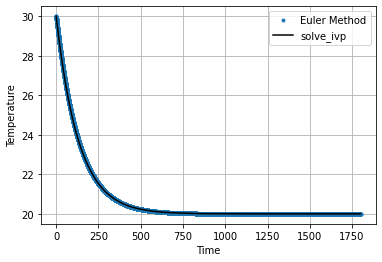

In [12]:
t_eval = np.linspace(0, 1800, 1000)
tspan = (t_eval[0], t_eval[-1])

sol_temp = solve_ivp(heat_equations, tspan, (30, ), t_eval = t_eval)

t = 0
T = 30
time = [];  time.append(t)
temperature = []; temperature.append(T)

h = 0.1
while t <= 1800:
    T = T + h * heat_equations(t, T)
    t = t + h
    time.append(t)
    temperature.append(T)
    
plt.plot(time, temperature, '.', label='Euler Method')
plt.plot(sol_temp.t, sol_temp.y[0,:], 'k', label='solve_ivp')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.grid(True)
plt.legend()

#  Second Order ODEs (Oscillations)
![Image](http://www.sharetechnote.com/image/EngMath_DifferentialEq_Ex_SingleSpring_Vert_NoDamp_03.png)
From Newton's law we have,
$$F = m\frac{d^{2}x}{dt^2} = - kx$$

Rearranging we get, 
$$\frac{d^{2}x}{dt^2} + \frac{k}{m}x = 0$$

This has a solution of the form,
$$x = A\cos\left(\sqrt{\frac{k}{m}t} + \phi\right)$$

We'll take the follwoing for the mass and spring constant.<br>
$$K = 0.5$$<br>
$$m = 1$$<br>

The initial conditions are:<br>
$$x(0) = 2$$<br>
$$v(0) = 0$$<br>

Implies $\phi = 0$ and $A = 2$. Replace this into our previous equation, we get:
$$x(t) = 2\cos\left(\sqrt{\frac{k}{m}t}\right)$$

For numerical solutions, we can write the second-order equation as two coupled first-order equations:

$$\frac{dx}{dt} = V$$
and
$$\frac{dV}{dt} = -\frac{k}{m}x$$

When we use the Euler algorithm in this case, we get very poor results. See below.

We can tweak the basic idea, however, and get decent agreement with the actual solution. We can first update the velocity, then use the updated velocity in the caculcation of the new position. This is sometimes called the Euler-Cromer method.

In [13]:
#  Function that returns the derivatives
def equations(t, x):
    
    k = 0.5
    m = 1
    
    fprime = np.zeros((2, ))
    
    fprime[0] = x[1]
    fprime[1] = -k/m * x[0]
    
    return fprime

### scipy.integrate.solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, dense_output=False, events=None, vectorized=False, args=None, **options)

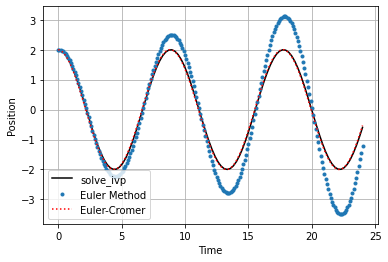

In [14]:
t_eval = np.linspace(0, 24, 100) #Times at which to store the computed solution, must be sorted and lie within t_span
tspan = (t_eval[0], t_eval[-1]) #Interval of integration
x0 = [2, 0] #Initial state

sol = solve_ivp(equations, tspan, x0, t_eval = t_eval)

plt.plot(sol.t, sol.y[0,:], 'k', label='solve_ivp')


#  Euler method
t = 0
x = 2
V = 0
h = 0.1

time = []; time.append(t)
position = []; position.append(x)
velocity = []; velocity.append(V)

while t <= 24:
    fprime = equations(t, [x, V])
    x = x + h * fprime[0]
    V = V + h * fprime[1]

    
    position.append(x)
    velocity.append(V)
    
    t = t + h
    time.append(t)
    
plt.plot(time, position, '.', label="Euler Method")
plt.xlabel('Time')
plt.ylabel('Position')
plt.grid(True)

#  Euler-Cromer method
t = 0
x = 2
V = 0
h = 0.1
time_ec = []; time_ec.append(t)
position_ec = []; position_ec.append(x)
velocity_ec = []; velocity_ec.append(V)

while t <= 24:
    fprime = equations(t, [x, V])

    V = V + h * fprime[1]
    x = x + h * V
    
    position_ec.append(x)
    velocity.append(V)
    
    t = t + h
    time_ec.append(t)
    
plt.plot(time_ec, position_ec, 'r:', label='Euler-Cromer')
plt.legend()

##  Runge Kutta Methods
Our objective is to solve the equation:<br>
$$\frac{dy}{dt} = f(t, y)$$
with $y(t_0) = y_0$.

Our update rule is,
$$t_{N +1}= T_N + h$$
$$y_{N+1} = y_n + \frac{1}{6}h  (k_1 + 2k_2 + 2k_3 + k_4)$$

With
$$
\begin{array}{ll}
k_1 = & f(t_N, y_N) \\
k_2 = & f\left(t_N + \frac{h}{2}. y_N + h\frac{k_1}{2} \right) \\
k_3 = & f\left(t_N + \frac{h}{2}. y_N + h\frac{k_2}{2} \right)\\
k_4 = & f(t_N + h, y_N + hk_3)
\end{array}
$$

##  Runge Kutta:  Heat Flow Problem

We will apply Runge Kutta to our first problem instead of using Euler:

Text(0, 0.5, 'Temperature')

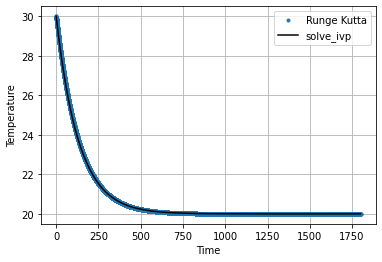

In [15]:
t = 0
T = 30
h = 0.1

time_rk = [];  time_rk.append(t)
temperature_rk = []; temperature_rk.append(T)

while t <= 1800:
    k1 = heat_equations(t, T)
    k2 = heat_equations(t + h/2, T + k1/2 * h)
    k3 = heat_equations(t + h/2, T + k2/2 * h)
    k4 = k4 = heat_equations(t + h, T + h*k3)
    
    t = t + h
    time_rk.append(t)
    
    T = T + (1.0/6.0) * h * (k1 + 2 * k2 + 2 * k4 + k4)
    temperature_rk.append(T)
    
plt.plot(time_rk, temperature_rk, '.', label='Runge Kutta')
plt.plot(sol_temp.t, sol_temp.y[0,:], 'k', label='solve_ivp')
plt.grid(True)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Temperature')

##  Harmonic Oscillator

In [1]:
Now we apply Runge Kutta to the second problem:

SyntaxError: invalid syntax (<ipython-input-1-982ea0591f87>, line 1)

Text(0, 0.5, 'Position')

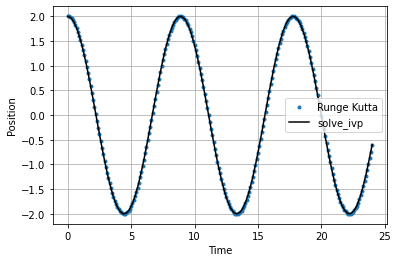

In [16]:
#  Euler method
t = 0
x = 2
V = 0
h = 0.1

time_rk = []; time_rk.append(t)
position_rk = []; position_rk.append(x)
velocity_rk = []; velocity_rk.append(V)

while t <= 24:

    X = [x, V]
    k1 = equations(t, X)
    
    X = [x + k1[0] * h/2, V + k1[1] * h / 2]
    k2 = equations(t + h /2, X)
    
    X = [x + k2[0] * h/2, V + k2[1] * h / 2]
    k3 = equations(t + h /2, X)
    
    X = [x + h*k3[0], V + h*k3[1]]
    k4 = equations(t + h, X)
    
    t = t + h
    time_rk.append(t)
    
    x = x + 1.0/6.0 * h * (k1[0] + 2*k2[0] + 2*k3[0] + k4[0])
    V = V + 1.0/6.0 * h * (k1[1] + 2*k2[1] + 2*k3[1] + k4[1])
    
    position_rk.append(x)
    velocity_rk.append(V)
    
plt.plot(time_rk, position_rk, '.', label='Runge Kutta')
plt.plot(sol.t, sol.y[0,:], 'k', label='solve_ivp')
plt.grid(True)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Position')